#### A credit score is a prediction of your credit behavior, such as how likely you are to pay a loan back on time, based on information from your credit reports. Companies use credit scores to make decisions on whether to offer you a mortgage, credit card, auto loan, and other credit products, as well as for tenant screening and insurance. They are also used to determine the interest rate and credit limit you receive. With the help of given dataset we will study how different factors affect credit score of an individual.

### Importing necessary libraries.......

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\priti\Downloads\Datasets\Credit score classification\Credit Score Classification Dataset.csv")
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High


### Data Defining...... 

### This data contains information about a sample of over 100 people across the world.The data includes the following information:

Age: The age of the person in years. 

Gender: The gender of the person(male or female).


Income: The annual income of the person in US Dollars.

Education: The highest level of the education completed by the person.

Marital Status: The marital status of the person (single, married, divorced or widowed). 

Number of Children: The no.of children the person has. 

Home Ownership: Whether the person owns the home or rents it. 

 Credit Score: The credit score of the person, which is a measure of the creditworthiness.

### Data Insights..... 

In [3]:
df.shape

(164, 8)

In [4]:
df.size

1312

In [5]:
df.ndim

2

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 164 non-null    int64 
 1   Gender              164 non-null    object
 2   Income              164 non-null    int64 
 3   Education           164 non-null    object
 4   Marital Status      164 non-null    object
 5   Number of Children  164 non-null    int64 
 6   Home Ownership      164 non-null    object
 7   Credit Score        164 non-null    object
dtypes: int64(3), object(5)
memory usage: 10.4+ KB


#### There are total 8 columns out of which 5 columns are categorical in nature. 

In [7]:
df.describe()

,Age,Income,Number of Children
count,164.000000,164.000000,164.000000
mean,37.975610,83765.243902,0.652439
std,8.477289,32457.306728,0.883346
min,25.000000,25000.000000,0.000000
25%,30.750000,57500.000000,0.000000
50%,37.000000,83750.000000,0.000000
75%,45.000000,105000.000000,1.000000
max,53.000000,162500.000000,3.000000


#### Checking for null values... 

In [8]:
df.isnull().sum()

Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64

There are no null values in the dataset. 

#### Checking for duplicates... 

In [9]:
df.duplicated().sum()

62

62 duplicate values are need to be removed. 

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(102, 8)

# Unique values in categorical columns..... 

In [12]:
df['Gender'].value_counts()

Female    52
Male      50
Name: Gender, dtype: int64

In [13]:
df['Education'].value_counts()

Bachelor's Degree      28
Master's Degree        23
Doctorate              20
High School Diploma    17
Associate's Degree     14
Name: Education, dtype: int64

In [14]:
df['Marital Status'].value_counts()

Married    58
Single     44
Name: Marital Status, dtype: int64

In [15]:
df['Home Ownership'].value_counts()

Owned     73
Rented    29
Name: Home Ownership, dtype: int64

In [16]:
df['Credit Score'].value_counts()

High       75
Average    21
Low         6
Name: Credit Score, dtype: int64

#  Visualizations.....

Text(0.5, 1.0, 'Age Distribution')

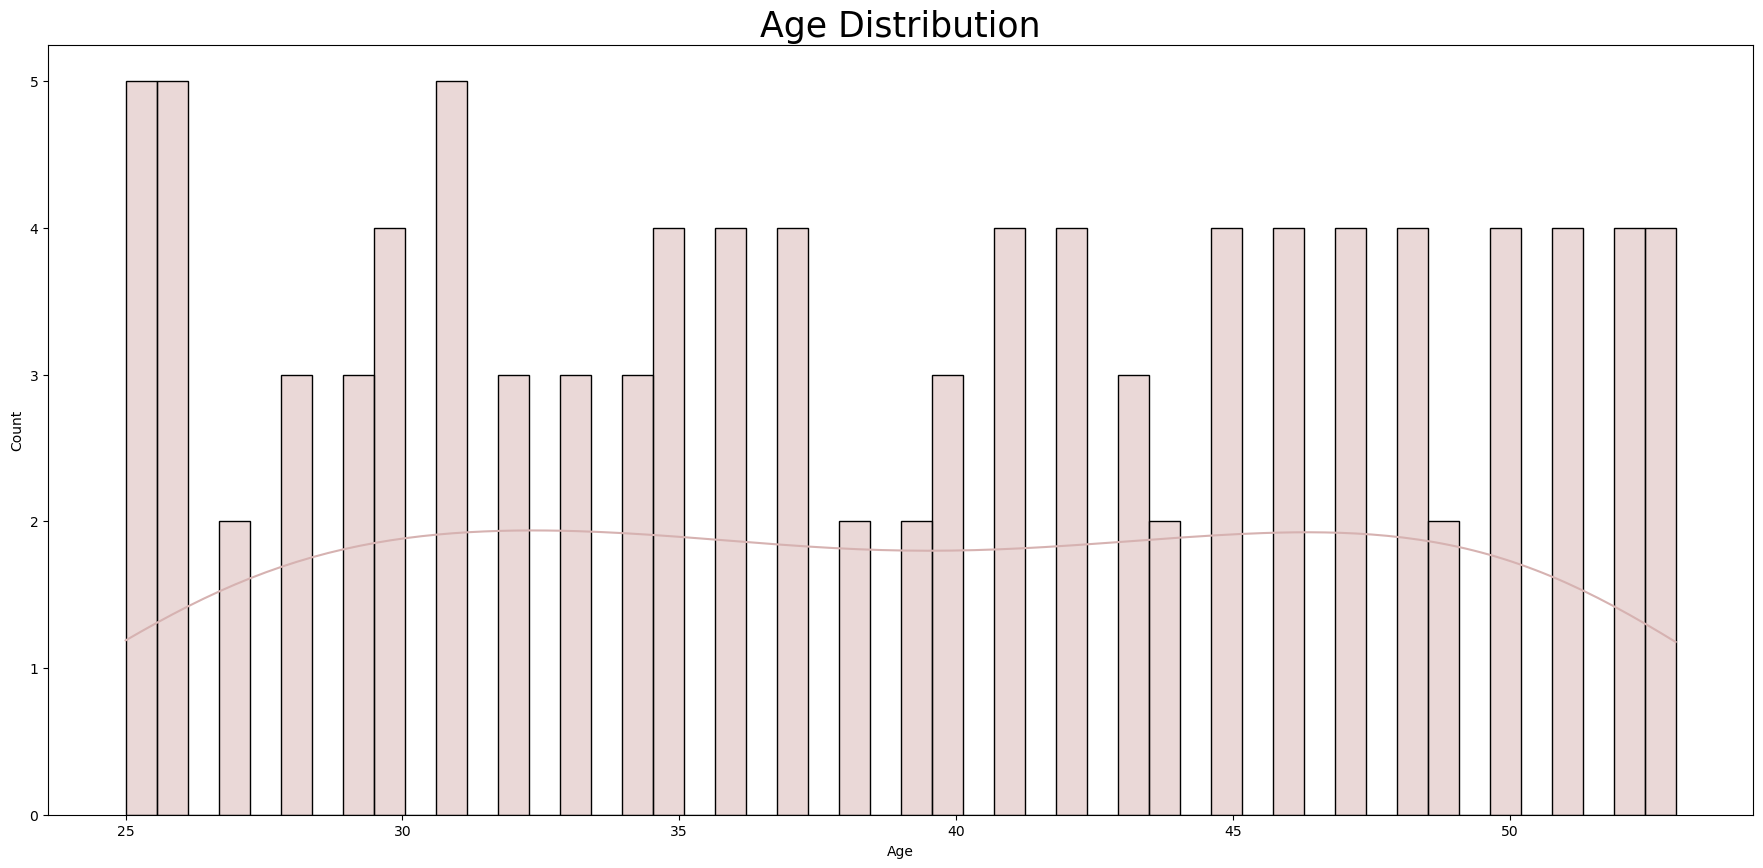

In [17]:
plt.subplots(figsize=(22,10))
p=sns.histplot(df['Age'],color= "#D6B2B1", kde=True, bins=50)
p.axes.set_title('Age Distribution',fontsize=25)


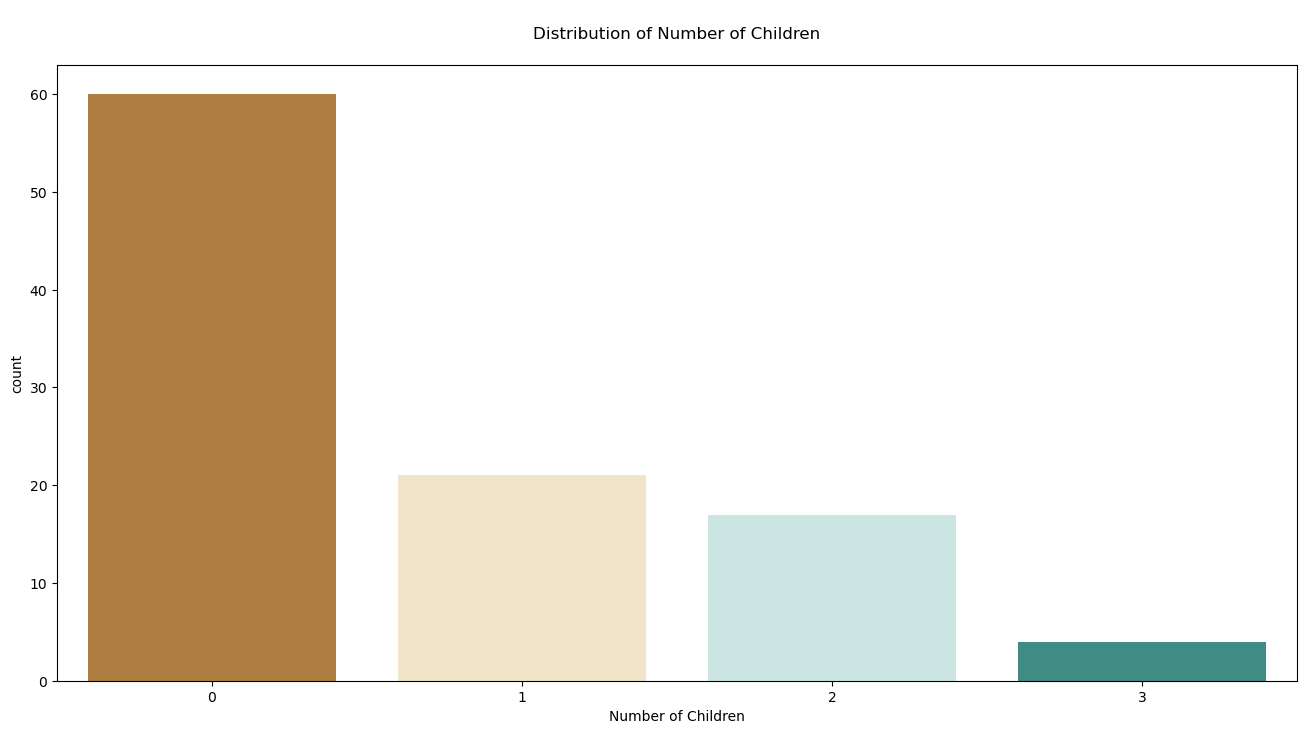

In [18]:
plt.figure(figsize=(16, 8))
sns.countplot(x="Number of Children",data=df,palette="BrBG",linewidth=3)
plt.title("\nDistribution of Number of Children\n")
plt.show()

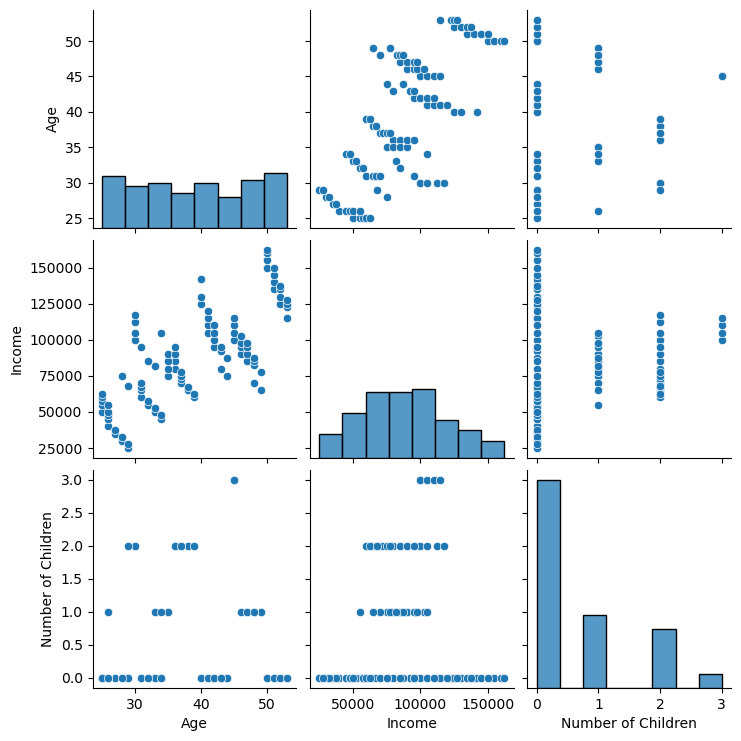

In [19]:
sns.pairplot(df)

In [20]:
df['Number of Children'].value_counts()

0    60
1    21
2    17
3     4
Name: Number of Children, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Income'>

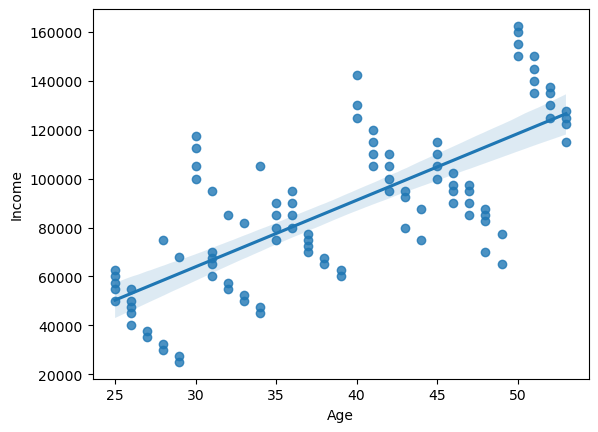

In [21]:
sns.regplot(x=df['Age'], y=df['Income'])

There is positive correlation between age and income. The plot shows as the age increases, so does income.



<AxesSubplot:xlabel='Age', ylabel='Income'>

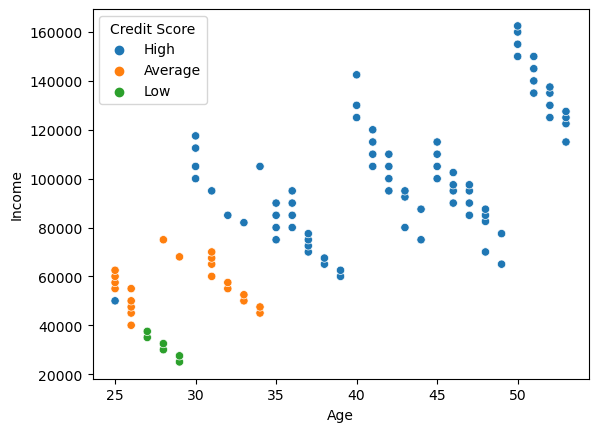

In [22]:
sns.scatterplot(x=df['Age'],y=df['Income'], hue=df['Credit Score'])

The scatter plot indicates that for younger user, their income tends to be lower than others and credit score is low.
Conversely, for older user, income tends to be higher thus credit score is high.

<AxesSubplot:xlabel='Age', ylabel='Income'>

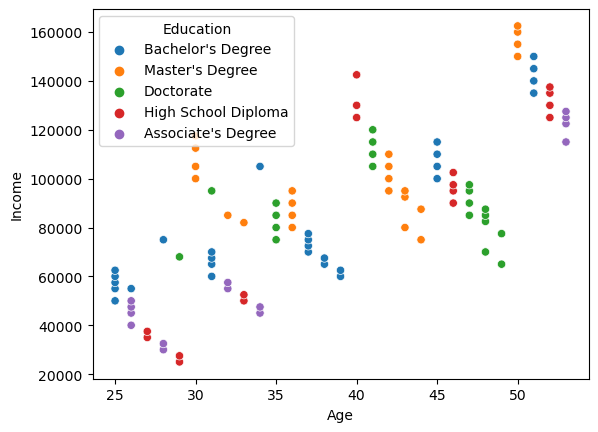

In [23]:
sns.scatterplot(x=df['Age'], y=df['Income'], hue=df['Education'])

The scatter plot shows a correlation across different Age groups, the education level has a strong influence on income regardless of age. 

# Bar Charts..... 

<AxesSubplot:xlabel='Home Ownership', ylabel='count'>

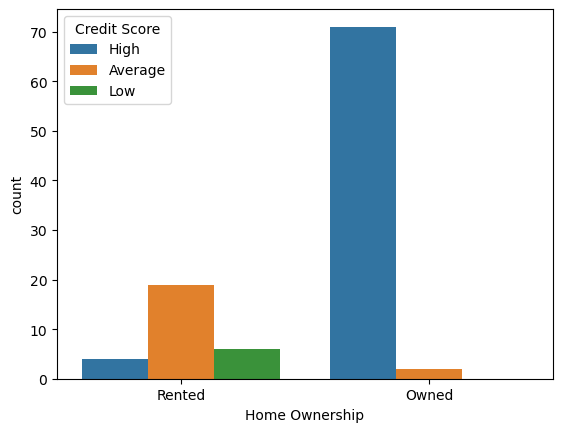

In [24]:
sns.countplot(x='Home Ownership', hue='Credit Score', data=df)

The bar chart shows that there are higher proportion of users who own a home among those with high credit score compared to those with a lower credit score

<AxesSubplot:xlabel='Credit Score', ylabel='Number of Children'>

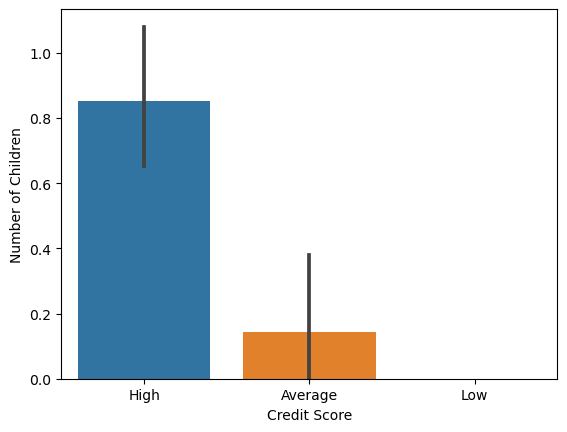

In [25]:
sns.barplot(y=df['Number of Children'], x=df['Credit Score'])


The Bar chart indicates that user with kids have high credit score compared to those without kids. 

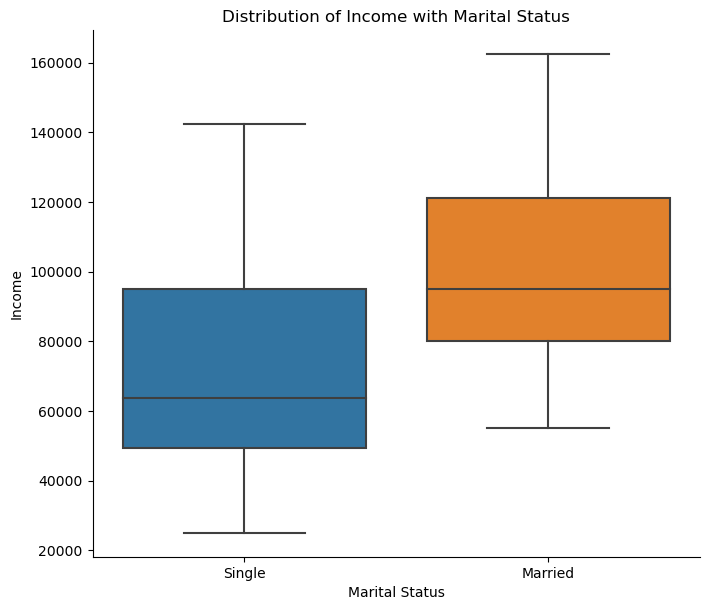

In [26]:
sns.catplot(x='Marital Status', y='Income', kind='box', data=df, height=6, aspect=1.2)
plt.ylabel('Income')
plt.xlabel('Marital Status')
plt.title("Distribution of Income with Marital Status")
plt.show()

It shown there is higher proportion of user who is Married with higher Income compared to those with Single

FINDING
Higher Income user are more likely to have a stable jobs and/or with children, which make them more Creditworthy.

User with children may more responsible with their finances and have a trtack record of pay bills on time, which impact their Credit Score

We may encourage the younger and/or single user, who take financial responsible and build a credit history for furture